# 1. Import and Install Dependencies

## 1.2 Load Dependencies

In [1]:
import os
import pathlib
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

2023-02-05 22:24:23.483494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 22:24:24.658227: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ines/anaconda3/envs/tf/lib/
2023-02-05 22:24:24.658303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ines/anaconda3/envs/tf/lib/
2023-02-05 22:24:24.658311: W tensorflow/compiler/tf2tensorr

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [2]:
CAPUCHIN_FILE = os.path.abspath("Parsed_Capuchinbird_Clips/XC114131-0.wav")
NOT_CAPUCHIN_FILE = os.path.abspath("Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav")


In [3]:
CAPUCHIN_FILE

'/home/ines/Downloads/DeepAudioClassification-main/Parsed_Capuchinbird_Clips/XC114131-0.wav'

## 2.2 Build Dataloading Function

In [4]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

## 2.3 Plot Wave

In [5]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

2023-02-05 22:24:40.568106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-05 22:24:40.568179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-02-05 22:24:40.577877: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 22:24:40.661108: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


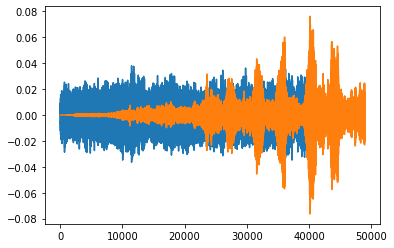

In [6]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [7]:
POS = os.path.abspath("Parsed_Capuchinbird_Clips")
NEG = os.path.abspath("Parsed_Not_Capuchinbird_Clips")

## 3.2 Create Tensorflow Datasets

In [8]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

## 3.3 Add labels and Combine Positive and Negative Samples

In [9]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [10]:
data.as_numpy_iterator().next()

(b'/home/ines/Downloads/DeepAudioClassification-main/Parsed_Capuchinbird_Clips/XC526106-0.wav',
 1.0)

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculate Wave Cycle Length

In [11]:
lengths = []
for file in os.listdir(os.path.abspath("Parsed_Capuchinbird_Clips")):
    tensor_wave = load_wav_16k_mono(os.path.join('/home/ines/Downloads/DeepAudioClassification-main','Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [12]:
lengths

[40000,
 48000,
 56000,
 48000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 48000,
 56000,
 64000,
 56000,
 40000,
 64000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 64000,
 64000,
 48000,
 56000,
 64000,
 56000,
 64000,
 32000,
 40000,
 48000,
 40000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 64000,
 48000,
 64000,
 48000,
 48000,
 40000,
 48000,
 48000,
 56000,
 56000,
 48000,
 40000,
 56000,
 48000,
 40000,
 56000,
 48000,
 48000,
 56000,
 48000,
 64000,
 64000,
 40000,
 40000,
 72000,
 56000,
 56000,
 56000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 40000,
 64000,
 56000,
 56000,
 40000,
 64000,
 56000,
 64000,
 48000,
 64000,
 56000,
 48000,
 48000,
 48000,
 64000,
 64000,
 64000,
 48000,
 48000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 40000,
 48000,
 48000,


## 4.2 Calculate Mean, Min and Max

In [13]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [14]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [15]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [16]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

In [17]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [18]:
spectrogram, label = preprocess(filepath, label)

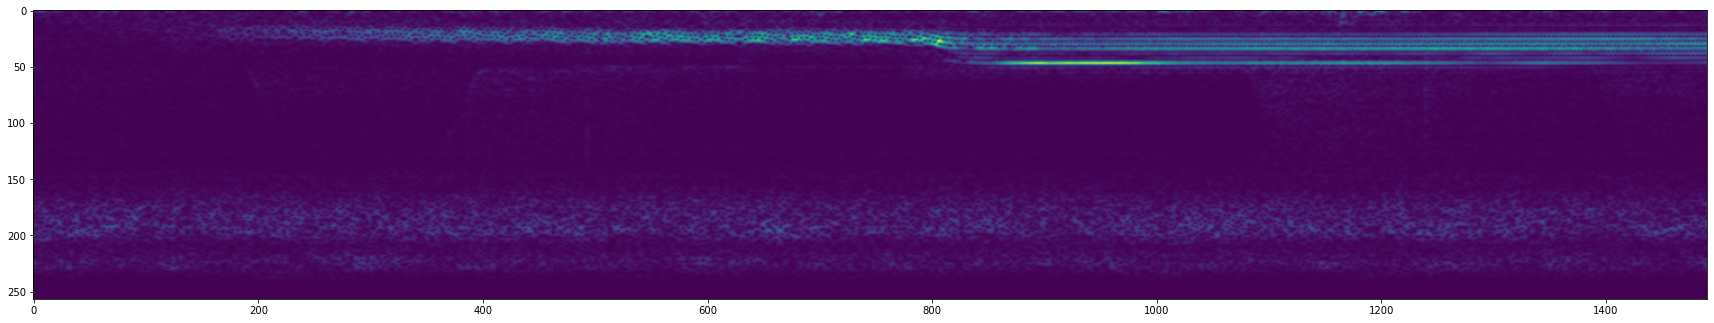

In [19]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [20]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


## 6.2 Split into Training and Testing Partitions

In [21]:
train = data.take(36)
test = data.skip(36).take(15)

## 6.3 Test One Batch

In [22]:
samples, labels = train.as_numpy_iterator().next()

In [23]:
samples.shape

(16, 1491, 257, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [25]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2023-02-05 22:24:55.503693: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 3081920512 exceeds 10% of free system memory.
2023-02-05 22:24:56.299556: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 3081920512 exceeds 10% of free system memory.
2023-02-05 22:24:56.730866: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 3081920512 exceeds 10% of free system memory.


In [26]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mmmm

## 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [29]:
X_test, y_test = test.as_numpy_iterator().next()

In [30]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 657ms/step


## 8.2 Convert Logits to Classes 

In [31]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [32]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [40]:
mp3 = os.path.abspath("Forest Recordings/recording_00.mp3")

In [41]:
wav = load_mp3_16k_mono(mp3)

In [42]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [43]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [44]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [45]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [46]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

2023-02-05 22:29:57.728384: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1555230720 exceeds 10% of free system memory.
2023-02-05 22:29:58.346053: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1540960256 exceeds 10% of free system memory.


3/3 [==============================] - 5s 1s/step


## 9.4 Group Consecutive Detections

In [47]:
from itertools import groupby

In [48]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [49]:
calls

5

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [51]:
results = {}
for file in os.listdir(os.path.abspath("Forest Recordings")):
    FILEPATH = os.path.join('/home/ines/Downloads/DeepAudioClassification-main','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

1/1 [==============================] - 2s 2s/step


In [52]:
results

{'recording_00.mp3': array([[0.5061048 ],
        [0.50135344],
        [0.5050791 ],
        [0.517288  ],
        [0.462338  ],
        [0.4952382 ],
        [0.49913716],
        [0.50591964],
        [0.50831026],
        [0.50550944],
        [0.50271285],
        [0.50483733],
        [0.5043898 ],
        [0.5319675 ],
        [0.44662428],
        [0.5030366 ],
        [0.5175285 ],
        [0.50291705],
        [0.50288665],
        [0.502836  ],
        [0.50327545],
        [0.49848783],
        [0.5027414 ],
        [0.50579524],
        [0.4566608 ],
        [0.5118789 ],
        [0.50391436],
        [0.501894  ],
        [0.50387645],
        [0.50096405],
        [0.5047533 ],
        [0.4987674 ],
        [0.5095967 ],
        [0.51646155],
        [0.5040601 ],
        [0.5079025 ],
        [0.45583794],
        [0.517283  ],
        [0.49925727],
        [0.50571203],
        [0.5119527 ],
        [0.50384223],
        [0.5068976 ],
        [0.49558207],
        [0.5

## 10.2 Convert Predictions into Classes

In [53]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_00.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_02.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [0,
  0,
  0,
  

## 10.3 Group Consecutive Detections

In [54]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_00.mp3': 0,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 0,
 'recording_05.mp3': 0,
 'recording_06.mp3': 0,
 'recording_07.mp3': 0,
 'recording_08.mp3': 0,
 'recording_09.mp3': 0,
 'recording_10.mp3': 0,
 'recording_11.mp3': 0,
 'recording_12.mp3': 0,
 'recording_13.mp3': 0,
 'recording_14.mp3': 0,
 'recording_15.mp3': 0,
 'recording_16.mp3': 0,
 'recording_17.mp3': 0,
 'recording_18.mp3': 0,
 'recording_19.mp3': 0,
 'recording_20.mp3': 0,
 'recording_21.mp3': 0,
 'recording_22.mp3': 0,
 'recording_23.mp3': 0,
 'recording_24.mp3': 0,
 'recording_25.mp3': 0,
 'recording_26.mp3': 0,
 'recording_27.mp3': 0,
 'recording_28.mp3': 0,
 'recording_29.mp3': 0,
 'recording_30.mp3': 0,
 'recording_31.mp3': 0,
 'recording_32.mp3': 0,
 'recording_33.mp3': 0,
 'recording_34.mp3': 0,
 'recording_35.mp3': 0,
 'recording_36.mp3': 0,
 'recording_37.mp3': 0,
 'recording_38.mp3': 0,
 'recording_39.mp3': 0,
 'recording_40.mp3': 0,
 'recording_41.m

# 11. Export Results

In [55]:
import csv

In [56]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])